# Actividad 2.2 Preprocesado de los datos
**Daniel Cruz Arciniega A01701370**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Preparar los datos

In [32]:
labels_csv = pd.read_csv("data/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [33]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


Guardar las rutas de las imágenes en el arreglo `filenames`

In [34]:
filenames = ["data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

filenames[:10]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [35]:
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [36]:
len(labels) == len(filenames)

True

In [37]:
# Guardar los valores únicos de razas
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [38]:
# Arreglo de booleanos
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

Convertir cada raza en un arreglo de booleanos para simplificar las clases en unos y ceros

In [39]:
bool_labels = [label == unique_breeds for label in labels]
len(bool_labels)

10222

In [40]:
print(labels[0]) # raza
print(np.where(unique_breeds == labels[0])) # indice en donde se encuentra la raza
print(bool_labels[0].argmax()) # indice donde se encuentra la raza en el arreglo booleano
print(bool_labels[0].astype(int)) # arreglo booleano con 0 y 1

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Crear datos de entrenamiento y de prueba
Se usarán X_val y y_val para validar todos los datos de entrenamiento porque los datos de prueba se encuentran en la carpeta `test` y no vienen con etiquetas.

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
N_IMAGES = 1000

In [43]:
X = filenames
y = bool_labels

X_train, X_val, y_train, y_val = train_test_split(X[:N_IMAGES],
                                                  y[:N_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

## Preprocesamiento de datos
En esta sección se convertirán las imágenes a formato numérico y se crearán batches a partir de los datos.

In [49]:
import numpy as np
from PIL import Image

### Preprocesamiento de imágenes
Convertir las imágenes en formato numérico usando la librería **Tensorflow**.

Convertir la imagen a tamaño 224x224.

In [53]:
# Tamaño de imagen
IMG_SIZE = 224

# Función para preprocesamiento de imágenes
def process_image(image_path):
  # Leer el archivo de imagen
  image = Image.open(image_path)
  # Convertir la imagen a escala de grises si es necesario
  if image.mode != 'RGB':
      image = image.convert('RGB')
  # Cambiar el tamaño de imagen a (224, 224)
  image = image.resize((IMG_SIZE, IMG_SIZE))
  # Convertir la imagen a un array numpy y normalizar los valores
  image = np.array(image) / 255.0
  return image

In [52]:
# Probar la función con la primera imagen
test_img = process_image(filenames[0])
test_img

array([[[0.6       , 0.36078431, 0.17254902],
        [0.65098039, 0.43137255, 0.23137255],
        [0.63529412, 0.45098039, 0.23529412],
        ...,
        [0.82745098, 0.73333333, 0.2627451 ],
        [0.72156863, 0.60392157, 0.2627451 ],
        [0.73333333, 0.60392157, 0.32156863]],

       [[0.65098039, 0.43921569, 0.27843137],
        [0.58823529, 0.4       , 0.22745098],
        [0.61568627, 0.45882353, 0.27058824],
        ...,
        [0.91764706, 0.81176471, 0.39607843],
        [0.83529412, 0.71764706, 0.34509804],
        [0.75686275, 0.62745098, 0.29019608]],

       [[0.46666667, 0.29803922, 0.16862745],
        [0.45098039, 0.29411765, 0.15686275],
        [0.77254902, 0.63529412, 0.48235294],
        ...,
        [0.88235294, 0.75686275, 0.41960784],
        [0.89411765, 0.76470588, 0.36470588],
        [0.83529412, 0.70196078, 0.29803922]],

       ...,

       [[0.73333333, 0.47058824, 0.26666667],
        [0.71764706, 0.45490196, 0.25098039],
        [0.74117647, 0

In [16]:
test_img.shape

(224, 224, 3)

### Convertir los datos en batches
Convertir los datos en batches de tamaño 32 para acelerar el proceso de ajuste del modelo.

También se necesitarán los datos en formato de tupla (imagen, etiqueta) para que tensorflow funcione correctamente.

### Método 1

In [54]:
BATCH_SIZE = 32

# Regresa una tupla (image, label)
def get_image_label(image_path, label):
    image = process_image(image_path)
    return image, label

# Convertir los datos en batches
def create_data_batches(X, y=None, valid_data=False, test_data=False):
    batches = []
    print("Creating data batches...")
    for i in range(0, len(X), BATCH_SIZE):
        print(f"Processing batch {i}...")
        if test_data:
            batch = X[i:i+BATCH_SIZE]
            labels = None
        else:
            batch = X[i:i+BATCH_SIZE]
            labels = y[i:i+BATCH_SIZE]
        images = []
        for image in batch:
            images.append(process_image(image))
        if test_data:
            batches.append(np.array(images))
        else:
            batches.append((np.array(images), np.array(labels)))
    return batches

Los batches tardaron 15 min en crearse

In [55]:
# Crear batches de entrenamiento y prueba
train_data = create_data_batches(X_train, y_train)
# val_data = create_data_batches(X_val, y_val, valid_data=True)
train_data

Creating data batches...
Processing batch 0...
Processing batch 32...
Processing batch 64...
Processing batch 96...
Processing batch 128...
Processing batch 160...
Processing batch 192...
Processing batch 224...
Processing batch 256...
Processing batch 288...
Processing batch 320...
Processing batch 352...
Processing batch 384...
Processing batch 416...
Processing batch 448...
Processing batch 480...
Processing batch 512...
Processing batch 544...
Processing batch 576...
Processing batch 608...
Processing batch 640...
Processing batch 672...
Processing batch 704...
Processing batch 736...
Processing batch 768...


[(array([[[[0.04705882, 0.05098039, 0.0627451 ],
           [0.05490196, 0.05882353, 0.07058824],
           [0.04705882, 0.05098039, 0.0627451 ],
           ...,
           [0.12156863, 0.05882353, 0.03137255],
           [0.08627451, 0.05882353, 0.02352941],
           [0.08627451, 0.0745098 , 0.04313725]],
  
          [[0.04313725, 0.05098039, 0.05490196],
           [0.03921569, 0.04313725, 0.05098039],
           [0.06666667, 0.07058824, 0.07843137],
           ...,
           [0.20392157, 0.18823529, 0.14509804],
           [0.12156863, 0.10588235, 0.10588235],
           [0.05098039, 0.03921569, 0.05098039]],
  
          [[0.09411765, 0.10196078, 0.09019608],
           [0.09803922, 0.10588235, 0.09411765],
           [0.05882353, 0.06666667, 0.05490196],
           ...,
           [0.19215686, 0.23137255, 0.17254902],
           [0.41568627, 0.41960784, 0.32156863],
           [0.34901961, 0.3372549 , 0.24313725]],
  
          ...,
  
          [[0.43529412, 0.38431373, 0.26

### Método 2

In [56]:
import tensorflow as tf

In [57]:
# Define image size
IMG_SIZE = 224

# Función para preprocesamiento de imágenes
def process_image(image_path):
  # Leer el archivo de imagen
  image = tf.io.read_file(image_path)
  # Convertir la imagen a formato numérico con RGB
  image = tf.image.decode_jpeg(image, channels=3)
  # Convertir los valores RGB de 0-255 a 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Cambiar el tamaño de imagen a (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [58]:
BATCH_SIZE = 32

# Regresa una tupla (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

# Convertir los datos en batches
def create_data_batches(X, y=None, valid_data=False, test_data=False):
  # No se necesitan etiquetas para datos de prueba
  if test_data:
    print("Datos de prueba")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Datos de validación")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # imagenes
                                               tf.constant(y))) # etiquetas
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Datos de entrenamiento")
    # Convertir imagenes y etiquetas en numeros
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    #  Revolver las imagenes y etiquetas
    data = data.shuffle(buffer_size=len(X))

    # Crear tuplas (image, label)
    data = data.map(get_image_label)

    # Convertir a batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [59]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Datos de entrenamiento
Datos de validación


In [107]:
train_data.element_spec[0].shape

TensorShape([None, 224, 224, 3])

In [65]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

## Entrenar el modelo

Modelo: https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/1

In [29]:
import tensorflow as tf
import tensorflow_hub as hub

In [97]:
url = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"
output_shape = len(unique_breeds)
input_shape = [None, IMG_SIZE, IMG_SIZE, 3]
m = tf.keras.Sequential([
    hub.KerasLayer(url),
    tf.keras.layers.Dense(output_shape, activation='softmax')
])
m.compile(optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=['accuracy'])
m.build(input_shape)


In [98]:
m.fit(x=train_data, 
    epochs=5, 
    validation_data=val_data, 
    validation_freq=1)

Epoch 1/5


25/25 [==============================] - 27s 918ms/step - loss: 4.6284 - accuracy: 0.1050 - val_loss: 3.4690 - val_accuracy: 0.2400
Epoch 2/5
25/25 [==============================] - 22s 882ms/step - loss: 1.6420 - accuracy: 0.6850 - val_loss: 2.1831 - val_accuracy: 0.5000
Epoch 3/5
25/25 [==============================] - 22s 888ms/step - loss: 0.5731 - accuracy: 0.9375 - val_loss: 1.7053 - val_accuracy: 0.5950
Epoch 4/5
25/25 [==============================] - 22s 888ms/step - loss: 0.2571 - accuracy: 0.9862 - val_loss: 1.5080 - val_accuracy: 0.6100
Epoch 5/5
25/25 [==============================] - 22s 888ms/step - loss: 0.1497 - accuracy: 0.9975 - val_loss: 1.4341 - val_accuracy: 0.6350


In [99]:
history = m.history.history
history

{'loss': [4.628356456756592,
  1.6420025825500488,
  0.5730706453323364,
  0.25707119703292847,
  0.14965420961380005],
 'accuracy': [0.10499999672174454,
  0.6850000023841858,
  0.9375,
  0.9862499833106995,
  0.9975000023841858],
 'val_loss': [3.4690048694610596,
  2.1830692291259766,
  1.7053276300430298,
  1.5080456733703613,
  1.4341158866882324],
 'val_accuracy': [0.23999999463558197,
  0.5,
  0.5950000286102295,
  0.6100000143051147,
  0.6349999904632568]}

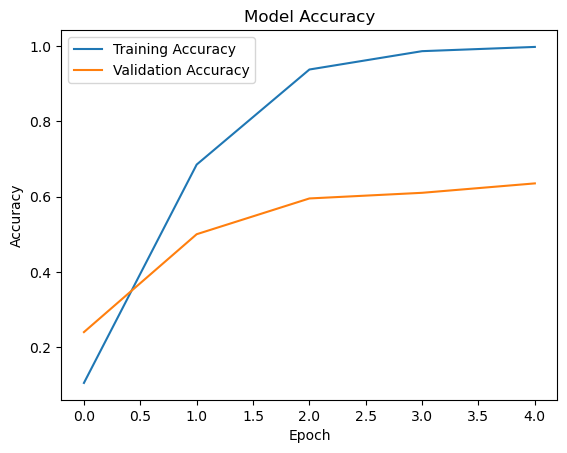

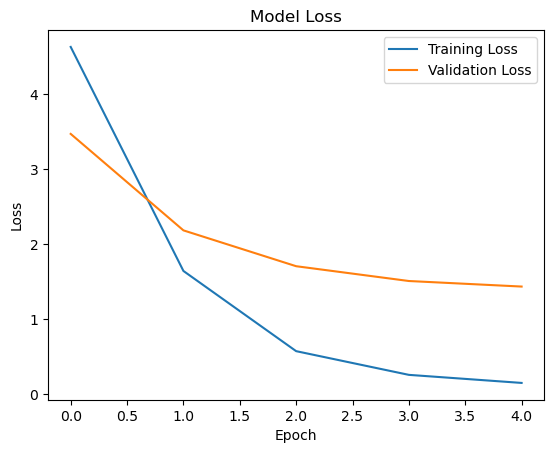

In [100]:
import matplotlib.pyplot as plt

# Get the accuracy and loss values from the history object
accuracy = history['accuracy']
loss = history['loss']

# Get the validation accuracy and loss values from the history object
val_accuracy = history['val_accuracy']
val_loss = history['val_loss']

# Plot the accuracy curves
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [82]:
predictions = m.predict(val_data, verbose=1)

7/7 [==============================] - 5s 639ms/step


In [83]:
predictions

array([[1.1830960e-03, 7.0602610e-04, 2.5153139e-03, ..., 1.2627094e-04,
        2.1296967e-04, 5.9928033e-03],
       [3.5818371e-03, 5.2372613e-03, 1.3627608e-02, ..., 6.3896505e-04,
        9.3580494e-03, 3.9624143e-03],
       [3.2457388e-05, 2.3118987e-04, 6.3157576e-04, ..., 1.7432762e-04,
        2.0954826e-04, 1.2667882e-03],
       ...,
       [1.0135214e-05, 4.4311917e-05, 7.3473180e-05, ..., 4.1954641e-05,
        2.0060559e-04, 6.3352338e-05],
       [1.7216436e-03, 4.8251476e-04, 1.6582364e-04, ..., 1.8970609e-04,
        5.8281148e-04, 2.0823402e-02],
       [4.6707169e-04, 2.0727188e-04, 1.9220077e-03, ..., 2.7111114e-03,
        1.3371655e-03, 1.1932218e-04]], dtype=float32)

In [84]:
np.sum(predictions[0])

1.0000001

In [85]:
unique_breeds[np.argmax(predictions[0])]

'border_terrier'

In [111]:
history["val_accuracy"][-1]

0.6349999904632568